In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

import sys

from clustering_scripts import *

In [2]:
def simple_gali(gali_matrix):
    if np.any(np.isnan(gali_matrix)):
        return np.nan
    else:
        _, s, _ = np.linalg.svd(gali_matrix)
        return np.prod(s)


def gali(gali_matrix):
    gali_matrix = np.transpose(gali_matrix, (2, 0, 1))
    gali = []
    for m in (gali_matrix):
        gali.append(simple_gali(m))
    gali = np.asarray(gali)
    return gali

In [10]:
OUTDIR = "/home/HPC/camontan/lhc_dynamic_indicators/out/htcondor_out"
TUNEDIR = '/home/HPC/camontan/lhc_dynamic_indicators/out/merged_tune'
IMGDIR = '/home/HPC/camontan/lhc_dynamic_indicators/img/paper_tier/'

In [4]:
# set latex rendering for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [13]:
lattice_list = ["b1_worst", "b1_avg", "b1_best", "b2_worst", "b2_avg", "b2_best"]
lattice_list = ["b1_worst", "b1_avg", "b1_best"]
extent_list = [
    np.array([0.0, 0.00125, 0.0, 0.00125]),
    np.array([0.0, 0.00130, 0.0, 0.00130]),
    np.array([0.0, 0.00140, 0.0, 0.00140]),
]
lattice_name_list = ["Worst", "Median", "Best"]
zeta_list = ["zeta_min", "zeta_avg", "zeta_max"]
zeta_name_list = ["0.0", "0.15", "0.3"]

In [6]:
files = os.listdir("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/")

In [7]:
bounds = 0.002
values = []
for f in tqdm(files):
    h5 = h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{f}", mode="r")
    stab = h5["stability"][:].reshape(100, 100)
    h5.close()

    # plt.figure()
    # plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
    # plt.colorbar(label="log10(stability)")
    # plt.title(f[:-3])
    # plt.tight_layout()
    # plt.savefig(f"/home/HPC/camontan/lhc_dynamic_indicators/img/quick_scan/{f[:-3]}.jpg")
    # plt.close("all")

    s_mask = stab==1000
    values.append((f, np.count_nonzero(s_mask)))

100%|██████████| 120/120 [00:02<00:00, 53.81it/s]


In [8]:
sorted_vals = list(filter(lambda x: "b1" in x[0], sorted(values, key=lambda x: x[1])))
sorted_vals

element_min = sorted_vals[0][0]
element_max = sorted_vals[-1][0]
element_medium = sorted_vals[len(sorted_vals)//2][0]

/tmp/ipykernel_4740/1175582213.py:4: RuntimeWarning: divide by zero encountered in log10
  img = axs[0].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))
/tmp/ipykernel_4740/1175582213.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[1].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))
/tmp/ipykernel_4740/1175582213.py:23: RuntimeWarning: divide by zero encountered in log10
  axs[2].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))


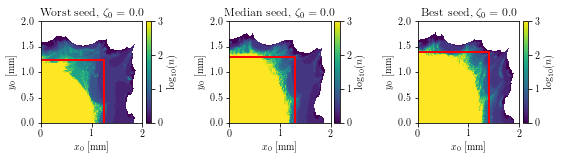

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3.5))
with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_min}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
img = axs[0].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))
# draw the borders of a red rectangle
axs[0].plot([0, extent_list[0][1]*1000, extent_list[0][1]*1000], [extent_list[0][1]*1000, extent_list[0][1]*1000, 0], color="red", linewidth=2)

axs[0].set_title("Worst seed, $\\zeta_0=0.0$")
axs[0].set_xlabel("$x_0$ [mm]")
axs[0].set_ylabel("$y_0$ [mm]")

with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_medium}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
axs[1].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))
# draw the borders of a red rectangle
axs[1].plot([0, extent_list[1][1]*1000, extent_list[1][1]*1000], [extent_list[1][1]*1000, extent_list[1][1]*1000, 0], color="red", linewidth=2)
axs[1].set_title("Median seed, $\\zeta_0=0.0$")
axs[1].set_xlabel("$x_0$ [mm]")
axs[1].set_ylabel("$y_0$ [mm]")

with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_max}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
axs[2].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]))
# draw the borders of a red rectangle
axs[2].plot([0, extent_list[2][1]*1000, extent_list[2][1]*1000], [extent_list[2][1]*1000, extent_list[2][1]*1000, 0], color="red", linewidth=2)
axs[2].set_title("Best seed, $\\zeta_0=0.0$")
axs[2].set_xlabel("$x_0$ [mm]")
axs[2].set_ylabel("$y_0$ [mm]")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "quick_scan.png"), dpi=300, bbox_inches="tight")

In [16]:
lattice = lattice_list[0]
extent = extent_list[0]
zeta = zeta_list[0]

In [17]:
log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
birk_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_birkhoff_{lattice}_{zeta}.h5"), "r")
megno_file = h5py.File(os.path.join(OUTDIR, f"megno_displacement_{lattice}_{zeta}.h5"), "r")
rem_file = h5py.File(os.path.join(OUTDIR, f"rem_{lattice}_{zeta}.h5"), "r")
stability_file = h5py.File(os.path.join(OUTDIR, f"stability_{lattice}_{zeta}.h5"), "r")

In [49]:
megno_file["disp/x/megno"].keys()

<KeysViewHDF5 ['10', '100', '1000', '10000', '100000', '119', '11938', '1194', '12', '14', '1425', '14251', '143', '17', '170', '1701', '17013', '20', '203', '20309', '2031', '24', '242', '2424', '24245', '289', '2894', '28943', '29', '3455', '34551', '346', '35', '41', '412', '41246', '4125', '49', '492', '49239', '4924', '5878', '58780', '588', '59', '70', '7017', '70170', '702', '83768', '8377', '838', '84']>

In [19]:
rem_file["reference/initial/x"]
rem_file["reverse/x/10"]

<HDF5 dataset "10": shape (90000,), type "<f8">

In [18]:
l_list = []
l_name_list = []
e_list = []
z_list = []
z_name_list = []
stability_list = []
mask_list = []

gt_raw_data_list = []
threshold_list = []
gt_list = []
gt_plot_list = []

for (lattice, extent, l_name), (zeta, z_name) in itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list)):
    l_list.append(lattice)
    l_name_list.append(l_name)
    e_list.append(extent)
    z_list.append(zeta)
    z_name_list.append(z_name)
    stability_file = h5py.File(os.path.join(OUTDIR, f"stability_{lattice}_{zeta}.h5"), "r")
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
    t = 100000
    stability = stability_file["stability"][:]
    stability_list.append(stability)
    mask = np.log10(stability) == 5
    mask_list.append(mask)

    times = np.array(sorted(int(j) for j in log_disp_file[f"disp/x/log_disp"].keys()))

    disp_x = log_disp_file[f"disp/x/log_disp/{t}"][:]
    threshold = find_threshold_density(np.log10(disp_x[mask]), where_chaos="higher")
    threshold_list.append(threshold)

    gt = np.log10(disp_x) < threshold
    gt_list.append(gt)
    gt = np.array(gt, dtype=float)
    gt[~mask] = np.nan
    gt_plot_list.append(gt)
    gt_raw_data_list.append(np.log10(disp_x))


/tmp/ipykernel_4740/3945374122.py:34: RuntimeWarning: invalid value encountered in log10
  gt = np.log10(disp_x) < threshold
/tmp/ipykernel_4740/3945374122.py:39: RuntimeWarning: invalid value encountered in log10
  gt_raw_data_list.append(np.log10(disp_x))
/tmp/ipykernel_4740/3945374122.py:34: RuntimeWarning: invalid value encountered in log10
  gt = np.log10(disp_x) < threshold
/tmp/ipykernel_4740/3945374122.py:39: RuntimeWarning: invalid value encountered in log10
  gt_raw_data_list.append(np.log10(disp_x))
/tmp/ipykernel_4740/3945374122.py:34: RuntimeWarning: invalid value encountered in log10
  gt = np.log10(disp_x) < threshold
/tmp/ipykernel_4740/3945374122.py:39: RuntimeWarning: invalid value encountered in log10
  gt_raw_data_list.append(np.log10(disp_x))
/tmp/ipykernel_4740/3945374122.py:34: RuntimeWarning: invalid value encountered in log10
  gt = np.log10(disp_x) < threshold
/tmp/ipykernel_4740/3945374122.py:39: RuntimeWarning: invalid value encountered in log10
  gt_raw_dat

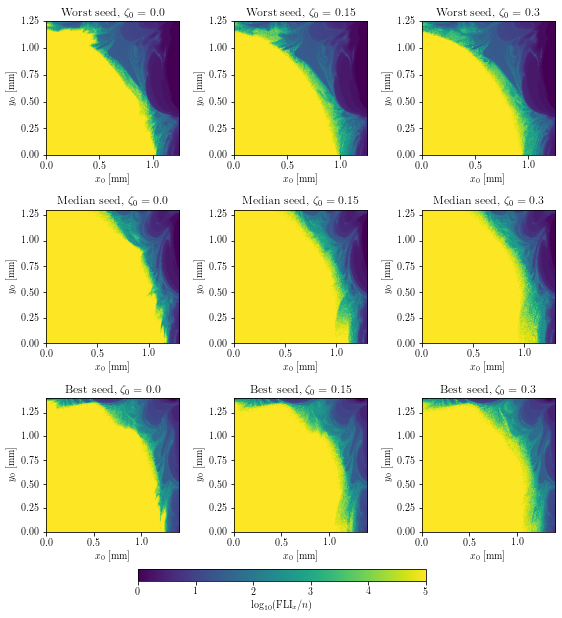

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

for i, ((lattice, extent, l_name), (zeta, z_name)) in enumerate(itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list))):

    ax = axs[i // 3, i % 3]
    im=ax.imshow(np.log10(stability_list[i]).reshape(300, 300), origin="lower", extent=1000 * e_list[i])
    ax.set_title(f"{l_name} seed, $\\zeta_0={z_name}$")
    ax.set_xlabel("$x_0$ [mm]")
    ax.set_ylabel("$y_0$ [mm]")

plt.tight_layout()

# add horizontal colorbar to the bottom
cbar_ax = fig.add_axes([0.25, -0.015, 0.5, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal", label="$\\log_{10}(\\mathrm{{FLI}}_x / n)$")
plt.savefig(os.path.join(IMGDIR, "stability.png"), dpi=300, bbox_inches="tight")

In [23]:
fli_x_data_list = []
fli_px_data_list = []
fli_y_data_list = []
fli_py_data_list = []
fli_zeta_data_list = []
fli_delta_data_list = []

fli_x_post_data_list = []
fli_px_post_data_list = []
fli_y_post_data_list = []
fli_py_post_data_list = []
fli_zeta_post_data_list = []
fli_delta_post_data_list = []

fli_x_thresh_list = []
fli_px_thresh_list = []
fli_y_thresh_list = []
fli_py_thresh_list = []
fli_zeta_thresh_list = []
fli_delta_thresh_list = []

fli_x_guesses_list = []
fli_px_guesses_list = []
fli_y_guesses_list = []
fli_py_guesses_list = []
fli_zeta_guesses_list = []
fli_delta_guesses_list = []

fli_x_scores_list = []
fli_px_scores_list = []
fli_y_scores_list = []
fli_py_scores_list = []
fli_zeta_scores_list = []
fli_delta_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
    for q in range(6):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        scores_list = []
        for t in times:
            if q == 0:
                disp = log_disp_file[f"disp/x/log_disp/{t}"][:]
            elif q == 1:
                disp = log_disp_file[f"disp/px/log_disp/{t}"][:]
            elif q == 2:
                disp = log_disp_file[f"disp/y/log_disp/{t}"][:]
            elif q == 3:
                disp = log_disp_file[f"disp/py/log_disp/{t}"][:]
            elif q == 4:
                disp = log_disp_file[f"disp/zeta/log_disp/{t}"][:]
            elif q == 5:
                disp = log_disp_file[f"disp/delta/log_disp/{t}"][:]
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
                
            disp = np.log10(disp / t)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

            post_data_list.append(disp)

            try:
                threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
            except:
                threshold = 1e-13
            thresh_list.append(threshold)

            guess = disp < threshold
            score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
            guess = np.asarray(guess, dtype=float)
            guess[~mask_list[i]] = np.nan
            guesses_list.append(guess)
            scores_list.append(score)
        
        if q == 0:
            fli_x_data_list.append(data_list)
            fli_x_post_data_list.append(post_data_list)
            fli_x_thresh_list.append(thresh_list)
            fli_x_guesses_list.append(guesses_list)
            fli_x_scores_list.append(scores_list)
        elif q == 1:
            fli_px_data_list.append(data_list)
            fli_px_post_data_list.append(post_data_list)
            fli_px_thresh_list.append(thresh_list)
            fli_px_guesses_list.append(guesses_list)
            fli_px_scores_list.append(scores_list)
        elif q == 2:
            fli_y_data_list.append(data_list)
            fli_y_post_data_list.append(post_data_list)
            fli_y_thresh_list.append(thresh_list)
            fli_y_guesses_list.append(guesses_list)
            fli_y_scores_list.append(scores_list)
        elif q == 3:
            fli_py_data_list.append(data_list)
            fli_py_post_data_list.append(post_data_list)
            fli_py_thresh_list.append(thresh_list)
            fli_py_guesses_list.append(guesses_list)
            fli_py_scores_list.append(scores_list)
        elif q == 4:
            fli_zeta_data_list.append(data_list)
            fli_zeta_post_data_list.append(post_data_list)
            fli_zeta_thresh_list.append(thresh_list)
            fli_zeta_guesses_list.append(guesses_list)
            fli_zeta_scores_list.append(scores_list)
        elif q == 5:
            fli_delta_data_list.append(data_list)
            fli_delta_post_data_list.append(post_data_list)
            fli_delta_thresh_list.append(thresh_list)
            fli_delta_guesses_list.append(guesses_list)
            fli_delta_scores_list.append(scores_list)

/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/755758001.py:64: RuntimeWarning: invalid value encou

-2.1219426361795914 -5.558374828854777


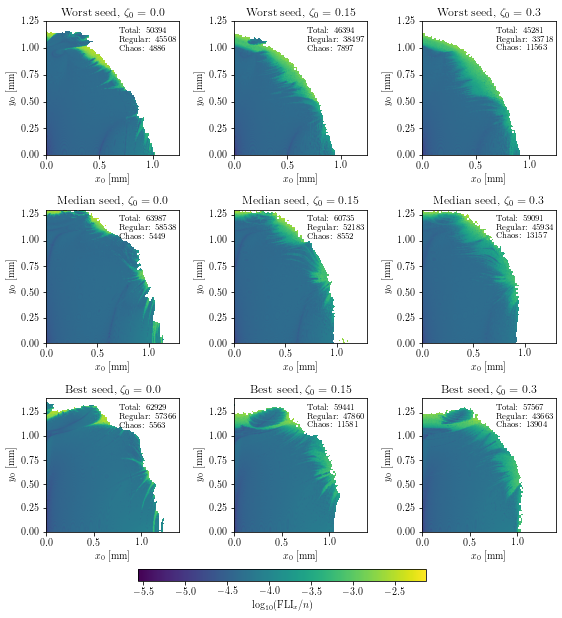

In [26]:
max_val = -np.inf
min_val = np.inf
for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    max_val = max(max_val, np.nanmax(fli_x_post_data_list[i][-1]))
    min_val = min(min_val, np.nanmin(fli_x_post_data_list[i][-1]))

print(max_val, min_val)

fig, axs = plt.subplots(3, 3, figsize=(8, 8))

for i, ((lattice, extent, l_name), (zeta, z_name)) in enumerate(itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list))):
    ax = axs[i // 3, i % 3]
    im = ax.imshow(fli_x_post_data_list[i][-1].reshape(300, 300), origin="lower", extent=1000 * e_list[i], vmin=min_val, vmax=max_val)
    ax.set_title(f"{l_name} seed, $\\zeta_0={z_name}$")
    ax.set_xlabel("$x_0$ [mm]")
    ax.set_ylabel("$y_0$ [mm]")

    total_vals = np.count_nonzero(~np.isnan(gt_plot_list[i]))
    zero_vals = np.count_nonzero(gt_plot_list[i] == 0)
    one_vals = np.count_nonzero(gt_plot_list[i] == 1)
    # write text on the top right of the plot
    textstr = f"Total: {total_vals}\nRegular: {one_vals}\nChaos: {zero_vals}"
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize="small", verticalalignment='top')


plt.tight_layout()

# add horizontal colorbar to the bottom
cbar_ax = fig.add_axes([0.25, -0.015, 0.5, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal", label="$\\log_{10}(\\mathrm{{FLI}}_x / n)$")
plt.savefig(os.path.join(IMGDIR, "all_fli_x.png"), dpi=300, bbox_inches="tight")


In [51]:
times[13]

100

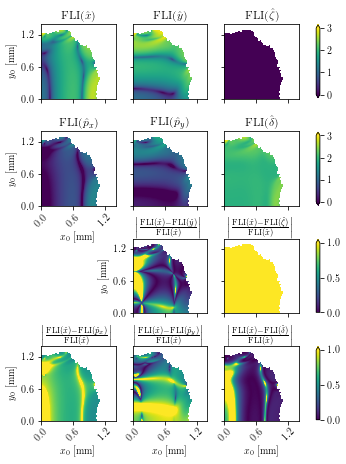

In [90]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4*2))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.05])

gs0 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,3], height_ratios=[0.3, 1, 0.3])
gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1,3], height_ratios=[0.3, 1, 0.3])
gs2 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[2,3], height_ratios=[0.3, 1, 0.3])
gs3 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[3,3], height_ratios=[0.3, 1, 0.3])

axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs0[1]),

    plt.subplot(gs[1,0]),
    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs1[1]),

    # plt.subplot(gs[2,0]),
    plt.subplot(gs[2,1]),
    plt.subplot(gs[2,2]),
    plt.subplot(gs2[1]),

    plt.subplot(gs[3,0]),
    plt.subplot(gs[3,1]),
    plt.subplot(gs[3,2]),
    plt.subplot(gs3[1]),
]

idx = 13
samples = 300

data_fli_x = fli_x_data_list[7][idx]
data_fli_px = fli_px_data_list[7][idx]
data_fli_y = fli_y_data_list[7][idx]
data_fli_py = fli_py_data_list[7][idx]
data_fli_zeta = fli_zeta_data_list[7][idx]
data_fli_delta = fli_delta_data_list[7][idx]

vmin = np.nanmin([np.nanmin(data_fli_x), np.nanmin(data_fli_px), np.nanmin(data_fli_y), np.nanmin(data_fli_py), np.nanmin(data_fli_zeta), np.nanmin(data_fli_delta)])
vmax = np.nanmax([np.nanmax(data_fli_x), np.nanmax(data_fli_px), np.nanmax(data_fli_y), np.nanmax(data_fli_py), np.nanmax(data_fli_zeta), np.nanmax(data_fli_delta)])

vmin=0
vmax=3

map = axs[0].imshow(data_fli_x.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[0].set_title("FLI$(\\hat{{x}})$")
axs[0].set_xlabel("$x_0$ [mm]")
axs[0].set_ylabel("$y_0$ [mm]")
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].set_xlabel("")

map = axs[1].imshow((data_fli_y).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[1].set_title("FLI$(\\hat{{y}})$")
axs[1].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")
axs[1].set_xticklabels([])
axs[1].set_xticks([])
axs[1].set_xlabel("")

map = axs[2].imshow((data_fli_zeta).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[2].set_title("FLI$(\\hat{{\\zeta}})$")
axs[2].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")
axs[2].set_xticklabels([])
axs[2].set_xticks([])
axs[2].set_xlabel("")

plt.colorbar(map, cax=axs[3], extend="both", fraction=0.5)

map = axs[4].imshow(data_fli_px.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[4].set_title("FLI$(\\hat{{p}}_x)$")
axs[4].set_xlabel("$x_0$ [mm]")
axs[4].set_ylabel("$y_0$ [mm]")

map = axs[5].imshow((data_fli_py).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[5].set_title("FLI$(\\hat{{p}}_y)$")
axs[5].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")
axs[5].set_xticklabels([])
axs[5].set_xticks([])
axs[5].set_xlabel("")

map = axs[6].imshow((data_fli_delta).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[6].set_title("FLI$(\\hat{{\\delta}})$")
axs[6].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[6].set_yticklabels([])
axs[6].set_yticks([])
axs[6].set_ylabel("")
axs[6].set_xticklabels([])
axs[6].set_xticks([])
axs[6].set_xlabel("")

plt.colorbar(map, cax=axs[7], extend="both", fraction=0.5)

diff_1 = np.abs(np.abs(data_fli_x - data_fli_y) / data_fli_x)
diff_2 = np.abs(np.abs(data_fli_x - data_fli_zeta) / data_fli_x)

diff_3 = np.abs(np.abs(data_fli_x - data_fli_px) / data_fli_x)
diff_4 = np.abs(np.abs(data_fli_x - data_fli_py) / data_fli_x)
diff_5 = np.abs(np.abs(data_fli_x - data_fli_delta) / data_fli_x)


vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2), np.nanmax(diff_3), np.nanmax(diff_4), np.nanmax(diff_5)])
vmax = 1.0
vmin = np.min([np.nanmin(diff_1), np.nanmin(diff_2), np.nanmin(diff_3), np.nanmin(diff_4), np.nanmin(diff_5)])
vmin = 0.0

map = axs[8].imshow(diff_1.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[8].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{y}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[8].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[8].set_ylabel("$y_0$ [mm]")
axs[8].set_xticklabels([])
axs[8].set_xticks([])
axs[8].set_xlabel("")

map = axs[9].imshow(diff_2.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[9].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{\\zeta}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[9].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[9].set_yticklabels([])
axs[9].set_yticks([])
axs[9].set_ylabel("")
axs[9].set_xticklabels([])
axs[9].set_xticks([])
axs[9].set_xlabel("")

plt.colorbar(map, cax=axs[10], extend="max", fraction=0.5)

map = axs[11].imshow(diff_3.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[11].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{p}}_x)}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[11].set_xlabel("$x_0$ [mm]")
axs[11].set_ylabel("$y_0$ [mm]")

map = axs[12].imshow(diff_4.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[12].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{p}}_y)}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[12].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[12].set_yticklabels([])
axs[12].set_yticks([])
axs[12].set_ylabel("")

map = axs[13].imshow(diff_5.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[13].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{\\delta}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[13].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[13].set_yticklabels([])
axs[13].set_yticks([])
axs[13].set_ylabel("")

plt.colorbar(map, cax=axs[14], extend="max", fraction=0.5)

# add space between subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=-0.05)
# set xticks for all plots
for i, ax in enumerate(axs):
    if i in [3, 7, 10, 14]:
        continue
    ax.set_yticks([0, 0.6, 1.2])
    ax.set_xticks([0, 0.6, 1.2])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# plt.tight_layout()

# save figure
plt.savefig(os.path.join(IMGDIR, f"LE_FLI_low.png"), bbox_inches="tight", dpi=300)

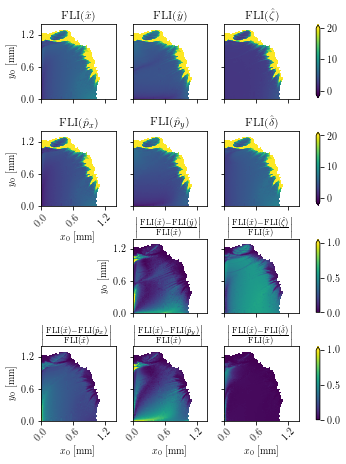

In [89]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4*2))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.05])

gs0 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,3], height_ratios=[0.3, 1, 0.3])
gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1,3], height_ratios=[0.3, 1, 0.3])
gs2 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[2,3], height_ratios=[0.3, 1, 0.3])
gs3 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[3,3], height_ratios=[0.3, 1, 0.3])

axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs0[1]),

    plt.subplot(gs[1,0]),
    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs1[1]),

    # plt.subplot(gs[2,0]),
    plt.subplot(gs[2,1]),
    plt.subplot(gs[2,2]),
    plt.subplot(gs2[1]),

    plt.subplot(gs[3,0]),
    plt.subplot(gs[3,1]),
    plt.subplot(gs[3,2]),
    plt.subplot(gs3[1]),
]

idx = -1
samples = 300

data_fli_x = fli_x_data_list[7][idx]
data_fli_px = fli_px_data_list[7][idx]
data_fli_y = fli_y_data_list[7][idx]
data_fli_py = fli_py_data_list[7][idx]
data_fli_zeta = fli_zeta_data_list[7][idx]
data_fli_delta = fli_delta_data_list[7][idx]

vmin = np.nanmin([np.nanmin(data_fli_x), np.nanmin(data_fli_px), np.nanmin(data_fli_y), np.nanmin(data_fli_py), np.nanmin(data_fli_zeta), np.nanmin(data_fli_delta)])
vmax = np.nanmax([np.nanmax(data_fli_x), np.nanmax(data_fli_px), np.nanmax(data_fli_y), np.nanmax(data_fli_py), np.nanmax(data_fli_zeta), np.nanmax(data_fli_delta)])

# vmin=0
vmax=20

map = axs[0].imshow(data_fli_x.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[0].set_title("FLI$(\\hat{{x}})$")
axs[0].set_xlabel("$x_0$ [mm]")
axs[0].set_ylabel("$y_0$ [mm]")
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].set_xlabel("")

map = axs[1].imshow((data_fli_y).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[1].set_title("FLI$(\\hat{{y}})$")
axs[1].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")
axs[1].set_xticklabels([])
axs[1].set_xticks([])
axs[1].set_xlabel("")

map = axs[2].imshow((data_fli_zeta).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[2].set_title("FLI$(\\hat{{\\zeta}})$")
axs[2].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")
axs[2].set_xticklabels([])
axs[2].set_xticks([])
axs[2].set_xlabel("")

plt.colorbar(map, cax=axs[3], extend="both", fraction=0.5)

map = axs[4].imshow(data_fli_px.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[4].set_title("FLI$(\\hat{{p}}_x)$")
axs[4].set_xlabel("$x_0$ [mm]")
axs[4].set_ylabel("$y_0$ [mm]")

map = axs[5].imshow((data_fli_py).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[5].set_title("FLI$(\\hat{{p}}_y)$")
axs[5].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")
axs[5].set_xticklabels([])
axs[5].set_xticks([])
axs[5].set_xlabel("")

map = axs[6].imshow((data_fli_delta).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[6].set_title("FLI$(\\hat{{\\delta}})$")
axs[6].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[6].set_yticklabels([])
axs[6].set_yticks([])
axs[6].set_ylabel("")
axs[6].set_xticklabels([])
axs[6].set_xticks([])
axs[6].set_xlabel("")

plt.colorbar(map, cax=axs[7], extend="both", fraction=0.5)

diff_1 = np.abs(np.abs(data_fli_x - data_fli_y) / data_fli_x)
diff_2 = np.abs(np.abs(data_fli_x - data_fli_zeta) / data_fli_x)

diff_3 = np.abs(np.abs(data_fli_x - data_fli_px) / data_fli_x)
diff_4 = np.abs(np.abs(data_fli_x - data_fli_py) / data_fli_x)
diff_5 = np.abs(np.abs(data_fli_x - data_fli_delta) / data_fli_x)


vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2), np.nanmax(diff_3), np.nanmax(diff_4), np.nanmax(diff_5)])
vmax = 1.0
vmin = np.min([np.nanmin(diff_1), np.nanmin(diff_2), np.nanmin(diff_3), np.nanmin(diff_4), np.nanmin(diff_5)])
vmin = 0.0

map = axs[8].imshow(diff_1.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[8].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{y}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[8].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[8].set_ylabel("$y_0$ [mm]")
axs[8].set_xticklabels([])
axs[8].set_xticks([])
axs[8].set_xlabel("")

map = axs[9].imshow(diff_2.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[9].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{\\zeta}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[9].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[9].set_yticklabels([])
axs[9].set_yticks([])
axs[9].set_ylabel("")
axs[9].set_xticklabels([])
axs[9].set_xticks([])
axs[9].set_xlabel("")

plt.colorbar(map, cax=axs[10], extend="max", fraction=0.5)

map = axs[11].imshow(diff_3.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[11].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{p}}_x)}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[11].set_xlabel("$x_0$ [mm]")
axs[11].set_ylabel("$y_0$ [mm]")

map = axs[12].imshow(diff_4.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[12].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{p}}_y)}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[12].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[12].set_yticklabels([])
axs[12].set_yticks([])
axs[12].set_ylabel("")

map = axs[13].imshow(diff_5.reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=vmin, vmax=vmax)
axs[13].set_title("$\\left|\\frac{{\\mathrm{{FLI}}(\\hat{{x}}) - \\mathrm{{FLI}}(\\hat{{\\delta}})}}{{\\mathrm{{FLI}}(\\hat{{x}})}}\\right|$")
axs[13].set_xlabel("$x_0$ [mm]")
# remove y-axis labels
axs[13].set_yticklabels([])
axs[13].set_yticks([])
axs[13].set_ylabel("")

plt.colorbar(map, cax=axs[14], extend="max", fraction=0.5)

# add space between subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=-0.05)
# set xticks for all plots
for i, ax in enumerate(axs):
    if i in [3, 7, 10, 14]:
        continue
    ax.set_yticks([0, 0.6, 1.2])
    ax.set_xticks([0, 0.6, 1.2])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# plt.tight_layout()
# save figure
plt.savefig(os.path.join(IMGDIR, f"LE_FLI_high.png"), bbox_inches="tight", dpi=300)

In [34]:
flibk_x_data_list = []
flibk_px_data_list = []
flibk_y_data_list = []
flibk_py_data_list = []
flibk_zeta_data_list = []
flibk_delta_data_list = []

flibk_x_post_data_list = []
flibk_px_post_data_list = []
flibk_y_post_data_list = []
flibk_py_post_data_list = []
flibk_zeta_post_data_list = []
flibk_delta_post_data_list = []

flibk_x_thresh_list = []
flibk_px_thresh_list = []
flibk_y_thresh_list = []
flibk_py_thresh_list = []
flibk_zeta_thresh_list = []
flibk_delta_thresh_list = []

flibk_x_guesses_list = []
flibk_px_guesses_list = []
flibk_y_guesses_list = []
flibk_py_guesses_list = []
flibk_zeta_guesses_list = []
flibk_delta_guesses_list = []

flibk_x_scores_list = []
flibk_px_scores_list = []
flibk_y_scores_list = []
flibk_py_scores_list = []
flibk_zeta_scores_list = []
flibk_delta_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_birkhoff_{lattice}_{zeta}.h5"), "r")
    for q in range(6):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        scores_list = []
        for t in times:
            if q == 0:
                disp = log_disp_file[f"disp/x/log_disp/{t}"][:]
            elif q == 1:
                disp = log_disp_file[f"disp/px/log_disp/{t}"][:]
            elif q == 2:
                disp = log_disp_file[f"disp/y/log_disp/{t}"][:]
            elif q == 3:
                disp = log_disp_file[f"disp/py/log_disp/{t}"][:]
            elif q == 4:
                disp = log_disp_file[f"disp/zeta/log_disp/{t}"][:]
            elif q == 5:
                disp = log_disp_file[f"disp/delta/log_disp/{t}"][:]
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
                
            disp = np.log10(disp / t)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

            post_data_list.append(disp)

            try:
                threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
            except:
                threshold = 1e-13
            thresh_list.append(threshold)

            guess = disp < threshold
            score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
            guess = np.asarray(guess, dtype=float)
            guess[~mask_list[i]] = np.nan
            guesses_list.append(guess)
            scores_list.append(score)
        
        if q == 0:
            flibk_x_data_list.append(data_list)
            flibk_x_post_data_list.append(post_data_list)
            flibk_x_thresh_list.append(thresh_list)
            flibk_x_guesses_list.append(guesses_list)
            flibk_x_scores_list.append(scores_list)
        elif q == 1:
            flibk_px_data_list.append(data_list)
            flibk_px_post_data_list.append(post_data_list)
            flibk_px_thresh_list.append(thresh_list)
            flibk_px_guesses_list.append(guesses_list)
            flibk_px_scores_list.append(scores_list)
        elif q == 2:
            flibk_y_data_list.append(data_list)
            flibk_y_post_data_list.append(post_data_list)
            flibk_y_thresh_list.append(thresh_list)
            flibk_y_guesses_list.append(guesses_list)
            flibk_y_scores_list.append(scores_list)
        elif q == 3:
            flibk_py_data_list.append(data_list)
            flibk_py_post_data_list.append(post_data_list)
            flibk_py_thresh_list.append(thresh_list)
            flibk_py_guesses_list.append(guesses_list)
            flibk_py_scores_list.append(scores_list)
        elif q == 4:
            flibk_zeta_data_list.append(data_list)
            flibk_zeta_post_data_list.append(post_data_list)
            flibk_zeta_thresh_list.append(thresh_list)
            flibk_zeta_guesses_list.append(guesses_list)
            flibk_zeta_scores_list.append(scores_list)
        elif q == 5:
            flibk_delta_data_list.append(data_list)
            flibk_delta_post_data_list.append(post_data_list)
            flibk_delta_thresh_list.append(thresh_list)
            flibk_delta_guesses_list.append(guesses_list)
            flibk_delta_scores_list.append(scores_list)

/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_4740/1861511744.py:64: RuntimeWarning: invalid va

35216
3503


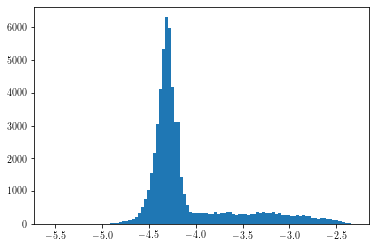

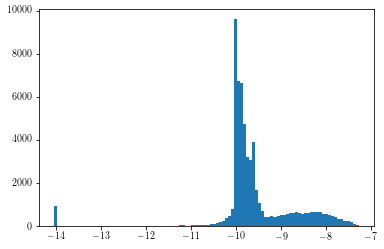

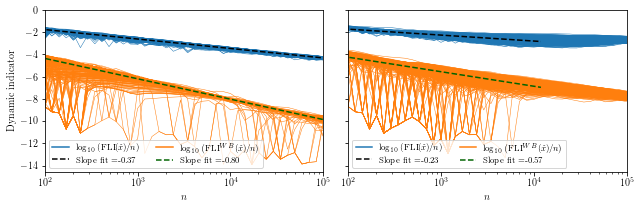

In [121]:
tmp_data = fli_x_post_data_list[7]
tmp_bdata = [p for p in flibk_x_post_data_list[7]]
plt.figure()
plt.hist(tmp_data[-1], bins=100)
plt.figure()
plt.hist(tmp_bdata[-1], bins=100)

stab_mask_min = -4.5 
stab_mask_max = -4.2
stab_mask = np.logical_and(np.logical_and(tmp_data[-1] > stab_mask_min, tmp_data[-1] < stab_mask_max), tmp_bdata[-1]>-14)

print(np.count_nonzero(stab_mask))

masked_data = [d[stab_mask][::100] for d in tmp_data]
masked_bdata = [d[stab_mask][::100] for d in tmp_bdata] 

tmp_data = np.log10(np.nanmean(np.power(10, masked_data), axis=1))
tmp_bdata = np.log10(np.nanmean(np.power(10, masked_bdata), axis=1))

fit_data = np.polyfit(np.log(times[12:]), tmp_data[12:], 1)
fit_bdata = np.polyfit(np.log(times[12:]), tmp_bdata[12:], 1)

fit_fn_data = np.poly1d(fit_data)
fit_fn_bdata = np.poly1d(fit_bdata)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].plot(times, masked_data, c="C0", linewidth=0.5)
axs[0].plot([],[], c="C0", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}(\\hat{x}) / n \\right)$")
axs[0].plot([], [], "--", c="black", label="Slope fit ={:.2f}".format(fit_data[0]))
# plt.plot(times, [np.mean(d) for d in masked_data])
axs[0].plot(times, masked_bdata, c="C1", linewidth=0.5)
axs[0].plot([],[], c="C1", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}^{{WB}}(\\hat{x}) / n \\right)$")
axs[0].plot([], [], "--", c="darkgreen", label="Slope fit ={:.2f}".format(fit_bdata[0]))
# plt.plot(times, [np.mean(d) for d in masked_bdata])

axs[0].plot(times, fit_fn_data(np.log(times)), "--", c="black")
axs[0].plot(times, fit_fn_bdata(np.log(times)), "--", c="darkgreen")

axs[0].set_xscale("log")
axs[0].set_xlim(1e2, 1e5)
axs[0].legend(ncol=2, fontsize="small")

tmp_data = fli_x_post_data_list[7]
tmp_bdata = [p for p in flibk_x_post_data_list[7]]

chaos_mask_min = -3.0
chaos_mask_max = -2.0
chaos_mask = np.logical_and(np.logical_and(tmp_data[-1] > chaos_mask_min, tmp_data[-1] < chaos_mask_max), tmp_bdata[-1]>-14)

print(np.count_nonzero(chaos_mask))

masked_data = [d[chaos_mask][::10] for d in tmp_data]
masked_bdata = [d[chaos_mask][::10] for d in tmp_bdata]

tmp_data = np.log10(np.nanmean(np.power(10, masked_data), axis=1))
tmp_bdata = np.log10(np.nanmean(np.power(10, masked_bdata), axis=1))

fit_data = np.polyfit(np.log(times[12:-12]), tmp_data[12:-12], 1)
fit_bdata = np.polyfit(np.log(times[12:-12]), tmp_bdata[12:-12], 1)

fit_fn_data = np.poly1d(fit_data)
fit_fn_bdata = np.poly1d(fit_bdata)

axs[1].plot(times, masked_data, c="C0", linewidth=0.5)
axs[1].plot([],[], c="C0", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}(\\hat{x}) / n \\right)$")
axs[1].plot([], [], "--", c="black", label="Slope fit ={:.2f}".format(fit_data[0]))
# plt.plot(times, [np.mean(d) for d in masked_data])
axs[1].plot(times, masked_bdata, c="C1", linewidth=0.5)
axs[1].plot([],[], c="C1", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}^{{WB}}(\\hat{x}) / n \\right)$")
axs[1].plot([], [], "--", c="darkgreen", label="Slope fit ={:.2f}".format(fit_bdata[0]))
# plt.plot(times, [np.mean(d) for d in masked_bdata])

axs[1].plot(times[:-12], fit_fn_data(np.log(times[:-12])), "--", c="black")
axs[1].plot(times[:-12], fit_fn_bdata(np.log(times[:-12])), "--", c="darkgreen")

axs[1].set_xscale("log")
axs[1].set_xlim(1e2, 1e5)
axs[1].legend(ncol=2, fontsize="small")

axs[0].set_xlabel("$n$")
axs[1].set_xlabel("$n$")

axs[0].set_ylabel("Dynamic indicator")
# axs[1].set_ylabel("$n$")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "fli_vs_flibk.png"), bbox_inches="tight", dpi=300)

In [51]:
megno_x_data_list = []
megno_px_data_list = []
megno_y_data_list = []
megno_py_data_list = []
megno_zeta_data_list = []
megno_delta_data_list = []

megno_x_post_data_list = []
megno_px_post_data_list = []
megno_y_post_data_list = []
megno_py_post_data_list = []
megno_zeta_post_data_list = []
megno_delta_post_data_list = []

megno_x_thresh_list = []
megno_px_thresh_list = []
megno_y_thresh_list = []
megno_py_thresh_list = []
megno_zeta_thresh_list = []
megno_delta_thresh_list = []

megno_x_guesses_list = []
megno_px_guesses_list = []
megno_y_guesses_list = []
megno_py_guesses_list = []
megno_zeta_guesses_list = []
megno_delta_guesses_list = []

megno_x_scores_list = []
megno_px_scores_list = []
megno_y_scores_list = []
megno_py_scores_list = []
megno_zeta_scores_list = []
megno_delta_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"megno_displacement_{lattice}_{zeta}.h5"), "r")
    for q in range(6):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        scores_list = []
        for t in times:
            if q == 0:
                disp = log_disp_file[f"disp/x/megno/{t}"][:]
            elif q == 1:
                disp = log_disp_file[f"disp/px/megno/{t}"][:]
            elif q == 2:
                disp = log_disp_file[f"disp/y/megno/{t}"][:]
            elif q == 3:
                disp = log_disp_file[f"disp/py/megno/{t}"][:]
            elif q == 4:
                disp = log_disp_file[f"disp/zeta/megno/{t}"][:]
            elif q == 5:
                disp = log_disp_file[f"disp/delta/megno/{t}"][:]
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
                
            disp = np.log10(disp / t)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

            post_data_list.append(disp)

            try:
                threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
            except:
                threshold = 1e-13
            thresh_list.append(threshold)

            guess = disp < threshold
            score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
            guess = np.asarray(guess, dtype=float)
            guess[~mask_list[i]] = np.nan
            guesses_list.append(guess)
            scores_list.append(score)
        
        if q == 0:
            megno_x_data_list.append(data_list)
            megno_x_post_data_list.append(post_data_list)
            megno_x_thresh_list.append(thresh_list)
            megno_x_guesses_list.append(guesses_list)
            megno_x_scores_list.append(scores_list)
        elif q == 1:
            megno_px_data_list.append(data_list)
            megno_px_post_data_list.append(post_data_list)
            megno_px_thresh_list.append(thresh_list)
            megno_px_guesses_list.append(guesses_list)
            megno_px_scores_list.append(scores_list)
        elif q == 2:
            megno_y_data_list.append(data_list)
            megno_y_post_data_list.append(post_data_list)
            megno_y_thresh_list.append(thresh_list)
            megno_y_guesses_list.append(guesses_list)
            megno_y_scores_list.append(scores_list)
        elif q == 3:
            megno_py_data_list.append(data_list)
            megno_py_post_data_list.append(post_data_list)
            megno_py_thresh_list.append(thresh_list)
            megno_py_guesses_list.append(guesses_list)
            megno_py_scores_list.append(scores_list)
        elif q == 4:
            megno_zeta_data_list.append(data_list)
            megno_zeta_post_data_list.append(post_data_list)
            megno_zeta_thresh_list.append(thresh_list)
            megno_zeta_guesses_list.append(guesses_list)
            megno_zeta_scores_list.append(scores_list)
        elif q == 5:
            megno_delta_data_list.append(data_list)
            megno_delta_post_data_list.append(post_data_list)
            megno_delta_thresh_list.append(thresh_list)
            megno_delta_guesses_list.append(guesses_list)
            megno_delta_scores_list.append(scores_list)

In [33]:
gali_x_px_data_list = []
gali_y_py_data_list = []
gali_zeta_delta_data_list = []
gali_x_y_data_list = []
gali_px_py_data_list = []
gali_6_data_list = []

gali_x_px_post_data_list = []
gali_y_py_post_data_list = []
gali_zeta_delta_post_data_list = []
gali_x_y_post_data_list = []
gali_px_py_post_data_list = []
gali_6_post_data_list = []

gali_x_px_thresh_list = []
gali_y_py_thresh_list = []
gali_zeta_delta_thresh_list = []
gali_x_y_thresh_list = []
gali_px_py_thresh_list = []
gali_6_thresh_list = []

gali_x_px_guesses_list = []
gali_y_py_guesses_list = []
gali_zeta_delta_guesses_list = []
gali_x_y_guesses_list = []
gali_px_py_guesses_list = []
gali_6_guesses_list = []

gali_x_px_scores_list = []
gali_y_py_scores_list = []
gali_zeta_delta_scores_list = []
gali_x_y_scores_list = []
gali_px_py_scores_list = []
gali_6_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
    for q in tqdm(range(6)):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        scores_list = []
        for t in tqdm(times):
            disp_x_x = log_disp_file[f"disp/x/normed_distance/x/{t}"][:]
            disp_x_px = log_disp_file[f"disp/x/normed_distance/px/{t}"][:]
            disp_x_y = log_disp_file[f"disp/x/normed_distance/y/{t}"][:]
            disp_x_py = log_disp_file[f"disp/x/normed_distance/py/{t}"][:]
            disp_x_zeta = log_disp_file[f"disp/x/normed_distance/zeta/{t}"][:]
            disp_x_delta = log_disp_file[f"disp/x/normed_distance/delta/{t}"][:]

            disp_px_x = log_disp_file[f"disp/px/normed_distance/x/{t}"][:]
            disp_px_px = log_disp_file[f"disp/px/normed_distance/px/{t}"][:]
            disp_px_y = log_disp_file[f"disp/px/normed_distance/y/{t}"][:]
            disp_px_py = log_disp_file[f"disp/px/normed_distance/py/{t}"][:]
            disp_px_zeta = log_disp_file[f"disp/px/normed_distance/zeta/{t}"][:]
            disp_px_delta = log_disp_file[f"disp/px/normed_distance/delta/{t}"][:]

            disp_y_x = log_disp_file[f"disp/y/normed_distance/x/{t}"][:]
            disp_y_px = log_disp_file[f"disp/y/normed_distance/px/{t}"][:]
            disp_y_y = log_disp_file[f"disp/y/normed_distance/y/{t}"][:]
            disp_y_py = log_disp_file[f"disp/y/normed_distance/py/{t}"][:]
            disp_y_zeta = log_disp_file[f"disp/y/normed_distance/zeta/{t}"][:]
            disp_y_delta = log_disp_file[f"disp/y/normed_distance/delta/{t}"][:]

            disp_py_x = log_disp_file[f"disp/py/normed_distance/x/{t}"][:]
            disp_py_px = log_disp_file[f"disp/py/normed_distance/px/{t}"][:]
            disp_py_y = log_disp_file[f"disp/py/normed_distance/y/{t}"][:]
            disp_py_py = log_disp_file[f"disp/py/normed_distance/py/{t}"][:]
            disp_py_zeta = log_disp_file[f"disp/py/normed_distance/zeta/{t}"][:]
            disp_py_delta = log_disp_file[f"disp/py/normed_distance/delta/{t}"][:]

            disp_zeta_x = log_disp_file[f"disp/zeta/normed_distance/x/{t}"][:]
            disp_zeta_px = log_disp_file[f"disp/zeta/normed_distance/px/{t}"][:]
            disp_zeta_y = log_disp_file[f"disp/zeta/normed_distance/y/{t}"][:]
            disp_zeta_py = log_disp_file[f"disp/zeta/normed_distance/py/{t}"][:]
            disp_zeta_zeta = log_disp_file[f"disp/zeta/normed_distance/zeta/{t}"][:]
            disp_zeta_delta = log_disp_file[f"disp/zeta/normed_distance/delta/{t}"][:]

            disp_delta_x = log_disp_file[f"disp/delta/normed_distance/x/{t}"][:]
            disp_delta_px = log_disp_file[f"disp/delta/normed_distance/px/{t}"][:]
            disp_delta_y = log_disp_file[f"disp/delta/normed_distance/y/{t}"][:]
            disp_delta_py = log_disp_file[f"disp/delta/normed_distance/py/{t}"][:]
            disp_delta_zeta = log_disp_file[f"disp/delta/normed_distance/zeta/{t}"][:]
            disp_delta_delta = log_disp_file[f"disp/delta/normed_distance/delta/{t}"][:]
            if q == 0:
                gali_matrix = np.asarray([
                [disp_x_x, disp_x_px],
                [disp_px_x, disp_px_px],
            ])
            elif q == 1:
                gali_matrix = np.asarray([
                [disp_y_y, disp_y_py],
                [disp_py_y, disp_py_py],
            ])
            elif q == 2:
                gali_matrix = np.asarray([
                [disp_zeta_zeta, disp_zeta_delta],
                [disp_delta_zeta, disp_delta_delta],
            ])
            elif q == 3:
                gali_matrix = np.asarray([
                [disp_x_x, disp_x_y],
                [disp_y_x, disp_y_y],
            ])
            elif q == 4:
                gali_matrix = np.asarray([
                [disp_px_px, disp_px_py],
                [disp_py_px, disp_py_py],
            ])
            elif q == 5:
                gali_matrix = np.asarray([
                [disp_x_x, disp_x_px, disp_x_y, disp_x_py, disp_x_zeta, disp_x_delta],
                [disp_px_x, disp_px_px, disp_px_y, disp_px_py, disp_px_zeta, disp_px_delta],
                [disp_y_x, disp_y_px, disp_y_y, disp_y_py, disp_y_zeta, disp_y_delta],
                [disp_py_x, disp_py_px, disp_py_y, disp_py_py, disp_py_zeta, disp_py_delta],
                [disp_zeta_x, disp_zeta_px, disp_zeta_y, disp_zeta_py, disp_zeta_zeta, disp_zeta_delta],
                [disp_delta_x, disp_delta_px, disp_delta_y, disp_delta_py, disp_delta_zeta, disp_delta_delta],
            ])

            disp = gali(gali_matrix)
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
                
            disp = np.log10(disp / t)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

            post_data_list.append(disp)

            try:
                threshold = find_threshold_smart(disp[mask_list[i]], where_chaos="gali")
            except:
                threshold = 1e-13
            thresh_list.append(threshold)

            guess = disp < threshold
            score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
            guess = np.asarray(guess, dtype=float)
            guess[~mask_list[i]] = np.nan
            guesses_list.append(guess)
            scores_list.append(score)
        
        if q == 0:
            gali_x_px_data_list.append(data_list)
            gali_x_px_post_data_list.append(post_data_list)
            gali_x_px_thresh_list.append(thresh_list)
            gali_x_px_guesses_list.append(guesses_list)
            gali_x_px_scores_list.append(scores_list)
        elif q == 1:
            gali_y_py_data_list.append(data_list)
            gali_y_py_post_data_list.append(post_data_list)
            gali_y_py_thresh_list.append(thresh_list)
            gali_y_py_guesses_list.append(guesses_list)
            gali_y_py_scores_list.append(scores_list)
        elif q == 2:
            gali_zeta_delta_data_list.append(data_list)
            gali_zeta_delta_post_data_list.append(post_data_list)
            gali_zeta_delta_thresh_list.append(thresh_list)
            gali_zeta_delta_guesses_list.append(guesses_list)
            gali_zeta_delta_scores_list.append(scores_list)
        elif q == 3:
            gali_x_y_data_list.append(data_list)
            gali_x_y_post_data_list.append(post_data_list)
            gali_x_y_thresh_list.append(thresh_list)
            gali_x_y_guesses_list.append(guesses_list)
            gali_x_y_scores_list.append(scores_list)
        elif q == 4:
            gali_px_py_data_list.append(data_list)
            gali_px_py_post_data_list.append(post_data_list)
            gali_px_py_thresh_list.append(thresh_list)
            gali_px_py_guesses_list.append(guesses_list)
            gali_px_py_scores_list.append(scores_list)
        elif q == 5:
            gali_6_data_list.append(data_list)
            gali_6_post_data_list.append(post_data_list)
            gali_6_thresh_list.append(thresh_list)
            gali_6_guesses_list.append(guesses_list)
            gali_6_scores_list.append(scores_list)

 33%|███▎      | 2/6 [05:27<10:42, 160.65s/it]/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/lhc_dynamic_indicators/notebooks/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/tmp/ipykernel_17249/2914384221.py:129: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17249/2914384221.py:129: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp / t)
 83%|████████▎ | 5/6 [12:50<02:30, 150.33s/it]/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/lhc_dynamic_indicators/notebooks/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/lhc_dynamic_indicators/notebooks/clustering_scripts.py:236: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision * recall / (precision + recall)
 33%|███▎  

KeyboardInterrupt: 

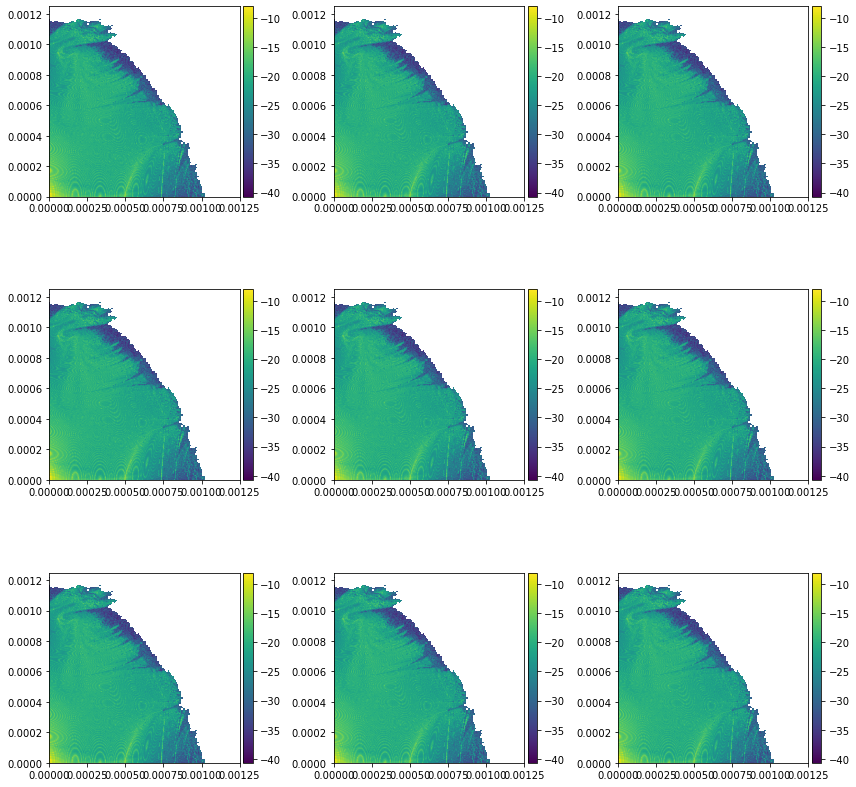

In [41]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    im = ax.imshow(gali_6_post_data_list[0][-1].reshape(300, 300), origin="lower", extent=e_list[0])
    # add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)

plt.tight_layout()

In [24]:
rem_data_list = []
rem_post_data_list = []
rem_thresh_list = []
rem_guesses_list = []
rem_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    rem_file = h5py.File(os.path.join(OUTDIR, f"rem_{lattice}_{zeta}.h5"), "r")

    data_list = []
    post_data_list = []
    thresh_list = []
    guesses_list = []
    scores_list = []
    for t in times:
        disp_x = rem_file[f"reverse/x/{t}"][:] - rem_file[f"reference/initial/x"][:]
        disp_px = rem_file[f"reverse/px/{t}"][:] - rem_file[f"reference/initial/px"][:]
        disp_y = rem_file[f"reverse/y/{t}"][:] - rem_file[f"reference/initial/y"][:]
        disp_py = rem_file[f"reverse/py/{t}"][:] - rem_file[f"reference/initial/py"][:]
        disp_zeta = rem_file[f"reverse/zeta/{t}"][:] - rem_file[f"reference/initial/zeta"][:]
        disp_delta = rem_file[f"reverse/delta/{t}"][:] - rem_file[f"reference/initial/delta"][:]

        disp = np.sqrt(disp_x**2 + disp_px**2 + disp_y**2 + disp_py**2 + disp_zeta**2 + disp_delta**2)
        
        data_list.append(disp)

        disp[~mask_list[i]] = np.nan
        if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
            disp[mask_list[i]] = 1e-14
            
        disp = np.log10(disp / t)
        disp[np.isinf(disp)] = np.nan
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

        post_data_list.append(disp)

        try:
            threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
        except:
            threshold = 1e-13
        thresh_list.append(threshold)

        guess = disp < threshold
        score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
        guess = np.asarray(guess, dtype=float)
        guess[~mask_list[i]] = np.nan
        guesses_list.append(guess)
        scores_list.append(score)

    rem_data_list.append(data_list)
    rem_post_data_list.append(post_data_list)
    rem_thresh_list.append(thresh_list)
    rem_guesses_list.append(guesses_list)
    rem_scores_list.append(scores_list)


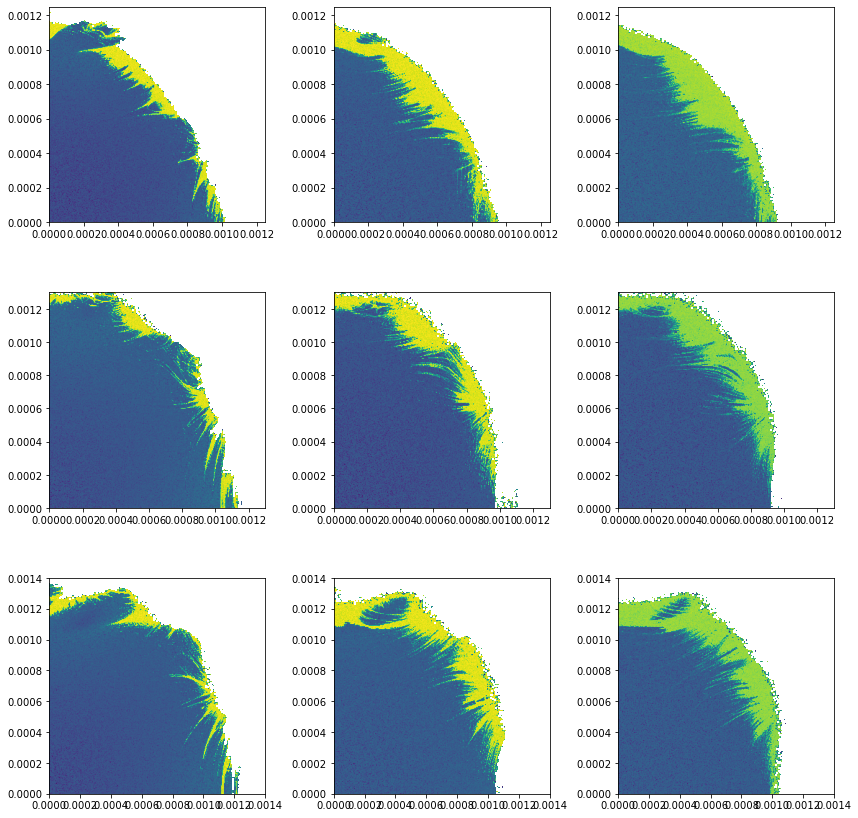

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(rem_post_data_list[i][-1].reshape(300, 300), origin="lower", extent=e_list[i])

plt.tight_layout()

In [43]:
tune_data_list = []
tune_post_data_list = []
tune_thresh_list = []
tune_guesses_list = []
tune_scores_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    tune_file = h5py.File(os.path.join(TUNEDIR, f"tune_birkhoff_full_{lattice}_{zeta}.h5"), "r")

    data_list = []
    post_data_list = []
    thresh_list = []
    guesses_list = []
    scores_list = []
    for t in times:
        disp_x = tune_file[f"tune/x/{0}/{t//2}"][:] - tune_file[f"tune/x/{t//2}/{t//2*2}"][:]
        disp_y = tune_file[f"tune/y/{0}/{t//2}"][:] - tune_file[f"tune/y/{t//2}/{t//2*2}"][:]

        disp = np.sqrt(disp_x**2 + disp_y**2)
        
        data_list.append(disp)

        disp[~mask_list[i]] = np.nan
        if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
            disp[mask_list[i]] = 1e-14
            
        disp = np.log10(disp / t)
        disp[np.isinf(disp)] = np.nan
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

        post_data_list.append(disp)

        try:
            threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
        except:
            threshold = 1e-13
        thresh_list.append(threshold)

        guess = disp < threshold
        score = classify_data(gt_list[i][mask_list[i]], guess[mask_list[i]])
        guess = np.asarray(guess, dtype=float)
        guess[~mask_list[i]] = np.nan
        guesses_list.append(guess)
        scores_list.append(score)

    tune_data_list.append(data_list)
    tune_post_data_list.append(post_data_list)
    tune_thresh_list.append(thresh_list)
    tune_guesses_list.append(guesses_list)
    tune_scores_list.append(scores_list)


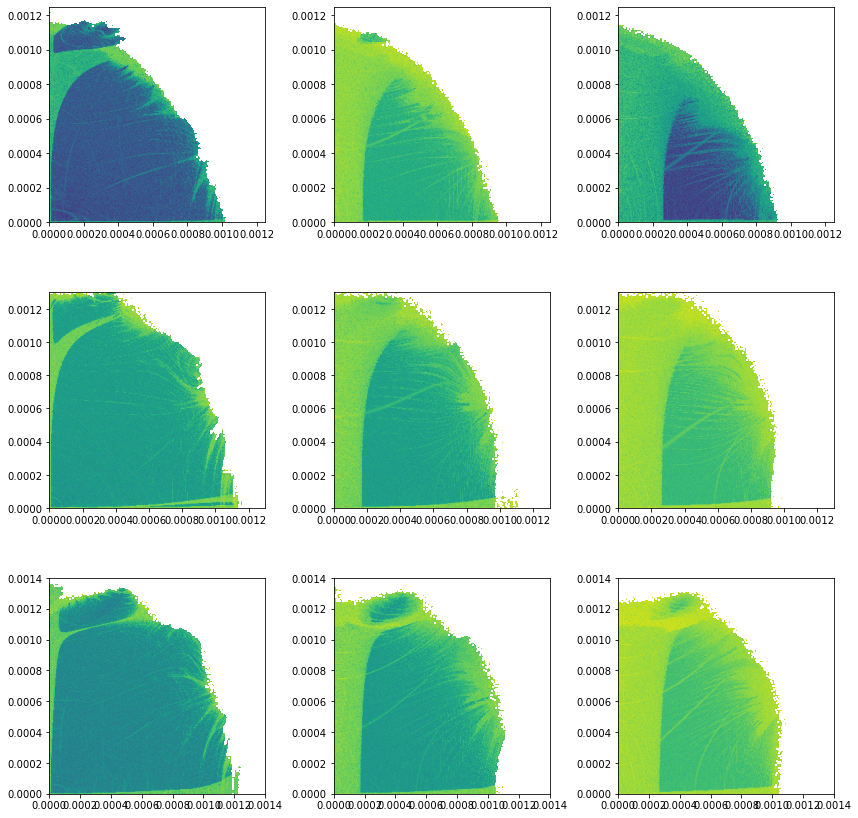

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(tune_post_data_list[i][-1].reshape(300, 300), origin="lower", extent=e_list[i])

plt.tight_layout()

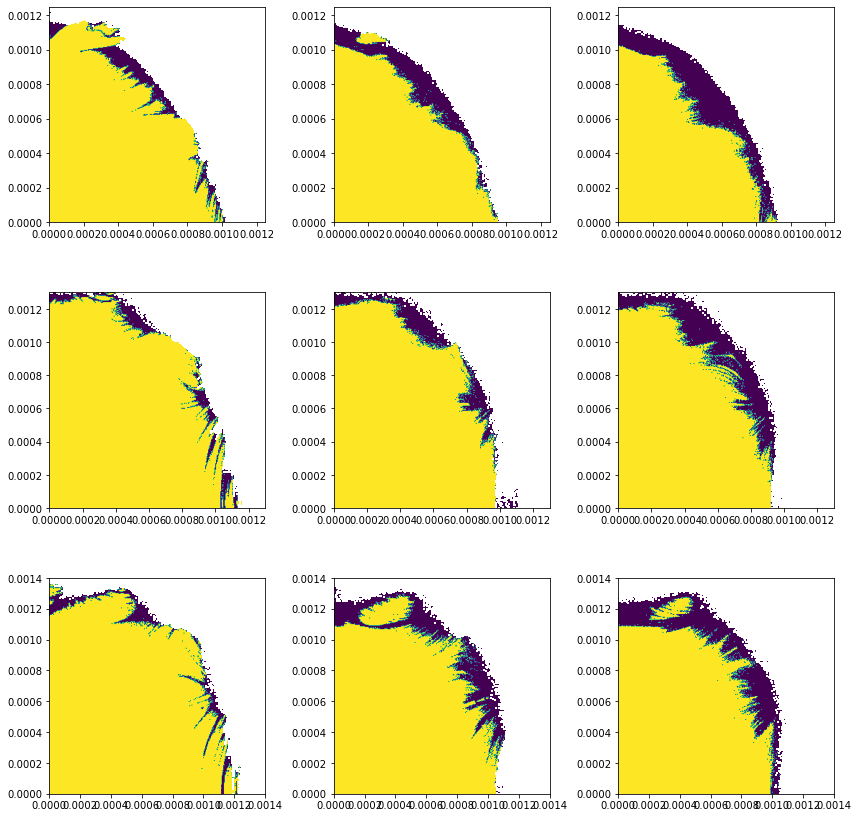

In [27]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(gt_list[i].reshape(300, 300), origin="lower", extent=e_list[i])

plt.tight_layout()

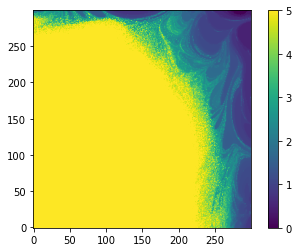

In [6]:
plt.imshow(np.log10(stability_file["stability"][:].reshape(300, 300)), origin="lower")
plt.colorbar()

In [7]:
mask = np.log10(stability_file["stability"][:]) == 5

In [80]:
t = 100000
disp_x = megno_file[f"disp/x/megno/{t}"][:]
disp_px = megno_file[f"disp/px/megno/{t}"][:]
disp_y = megno_file[f"disp/y/megno/{t}"][:]
disp_py = megno_file[f"disp/py/megno/{t}"][:]
disp_zeta = megno_file[f"disp/zeta/megno/{t}"][:]
disp_delta = megno_file[f"disp/delta/megno/{t}"][:]

disp_x[~mask] = np.nan
disp_px[~mask] = np.nan
disp_y[~mask] = np.nan
disp_py[~mask] = np.nan
disp_zeta[~mask] = np.nan
disp_delta[~mask] = np.nan

In [8]:
t = 100000
disp_x = log_disp_file[f"disp/x/log_disp/{t}"][:]
disp_px = log_disp_file[f"disp/px/log_disp/{t}"][:]
disp_y = log_disp_file[f"disp/y/log_disp/{t}"][:]
disp_py = log_disp_file[f"disp/py/log_disp/{t}"][:]
disp_zeta = log_disp_file[f"disp/zeta/log_disp/{t}"][:]
disp_delta = log_disp_file[f"disp/delta/log_disp/{t}"][:]

disp_x[~mask] = np.nan
disp_px[~mask] = np.nan
disp_y[~mask] = np.nan
disp_py[~mask] = np.nan
disp_zeta[~mask] = np.nan
disp_delta[~mask] = np.nan

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 9.000e+00, 6.000e+00,
        1.300e+01, 1.800e+01, 1.900e+01, 5.300e+01, 8.100e+01, 8.200e+01,
        9.900e+01, 1.410e+02, 1.820e+02, 2.660e+02, 3.630e+02, 5.110e+02,
        7.750e+02, 1.114e+03, 1.673e+03, 2.336e+03, 3.260e+03, 4.476e+03,
        5.287e+03, 5.859e+03, 4.657e+03, 3.081e+03, 2.598e+03, 2.162e+03,
        1.110e+03, 6.770e+02, 4.680e+02, 3.770e+02, 3.800e+02, 3.170e+02,
        3.260e+02, 3.230e+02, 3.180e+02, 2.910e+02, 3.250e+02, 2.980e+02,
        3.610e+02, 3.030e+02, 3.210e+02, 3.560e+02, 3.540e+02, 3.460e+02,
        3.780e+02, 4.280e+02, 4.120e+02, 4.500e+02, 4.580e+02, 4.690e+02,
        4.630e+02, 4.700e+02, 4.590e+02, 4.430e+02, 4.330e+02, 4.670e+02,
        5.290e+02, 5.590e+02, 5.350e+02, 4.050e+02, 3.580e+02, 3.260e+02,
        2.860e+02, 2.610e+02, 2.500e+0

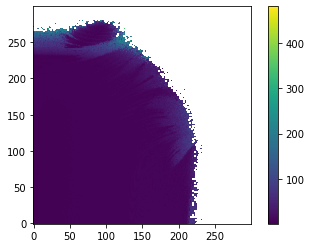

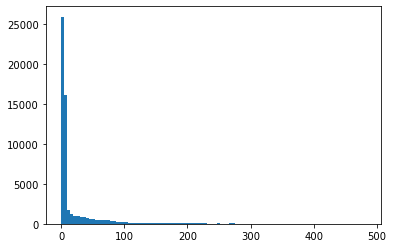

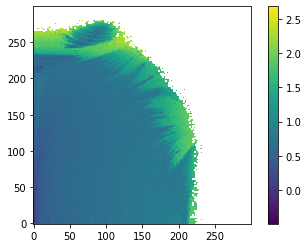

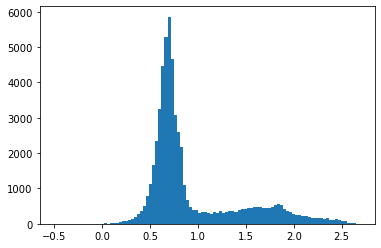

In [10]:
plt.figure()
plt.imshow((disp_x).reshape(300, 300), origin="lower")
plt.colorbar()
plt.figure()
plt.hist(disp_x[~np.isnan(disp_x)], bins=100)

plt.figure()
plt.imshow(np.log10(disp_x).reshape(300, 300), origin="lower")
plt.colorbar()
plt.figure()
plt.hist(np.log10(disp_x[~np.isnan(disp_x)]), bins=100)

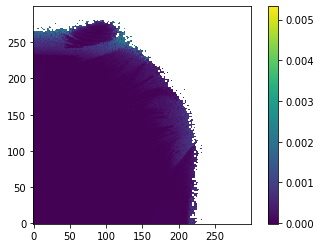

In [83]:
plt.imshow((disp_px).reshape(300, 300), origin="lower")
plt.colorbar()

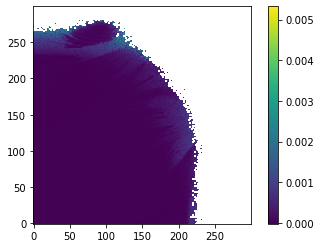

In [84]:
plt.imshow((disp_y).reshape(300, 300), origin="lower")
plt.colorbar()

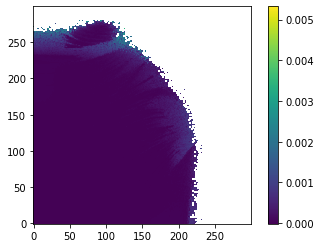

In [85]:
plt.imshow((disp_py).reshape(300, 300), origin="lower")
plt.colorbar()

/tmp/ipykernel_29730/1858016912.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_zeta).reshape(300, 300), origin="lower")


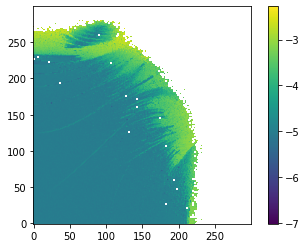

In [86]:
plt.imshow(np.log10(disp_zeta).reshape(300, 300), origin="lower")
plt.colorbar()

/tmp/ipykernel_29730/299526760.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_delta).reshape(300, 300), origin="lower")


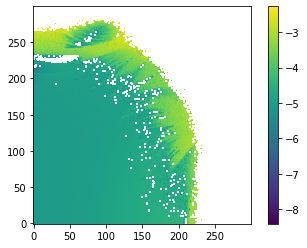

In [87]:
plt.imshow(np.log10(disp_delta).reshape(300, 300), origin="lower")
plt.colorbar()

In [56]:
megno_file["disp/x/megno"].keys()

<KeysViewHDF5 ['10', '100', '1000', '10000', '100000', '119', '11938', '1194', '12', '14', '1425', '14251', '143', '17', '170', '1701', '17013', '20', '203', '20309', '2031', '24', '242', '2424', '24245', '289', '2894', '28943', '29', '3455', '34551', '346', '35', '41', '412', '41246', '4125', '49', '492', '49239', '4924', '5878', '58780', '588', '59', '70', '7017', '70170', '702', '83768', '8377', '838', '84']>